 **Nhận diện hình ảnh**: TensorFlow được sử dụng rộng rãi trong các ứng dụng nhận diện hình ảnh, chẳng hạn như phân loại hình ảnh, phát hiện đối tượng và nhận diện khuôn mặt.

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3571 - loss: 1.7379 - val_accuracy: 0.5580 - val_loss: 1.2288
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5752 - loss: 1.1939 - val_accuracy: 0.6183 - val_loss: 1.0686
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6395 - loss: 1.0211 - val_accuracy: 0.6537 - val_loss: 0.9899
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6845 - loss: 0.9026 - val_accuracy: 0.6914 - val_loss: 0.8841
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7101 - loss: 0.8231 - val_accuracy: 0.6903 - val_loss: 0.8986
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7298 - loss: 0.7700 - val_accuracy: 0.7054 - val_loss: 0.8629
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7460 - loss: 0.7153 - val_accuracy: 0.7045 - val_loss: 0.8622
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7627 - l

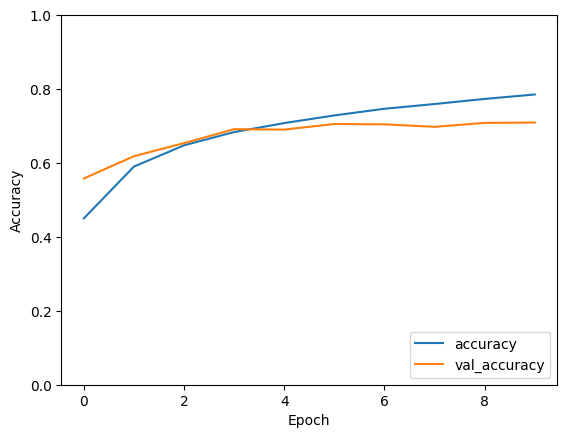

313/313 - 1s - 3ms/step - accuracy: 0.7093 - loss: 0.8703
0.7092999815940857


In [11]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Tải dữ liệu CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Bình thường hóa dữ liệu
train_images, test_images = train_images / 255.0, test_images / 255.0

# Xây dựng mô hình CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Đánh giá mô hình
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)